In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import math
import random
import radar
import calendar
from faker import Faker
fake = Faker()

In [13]:
# This was ChatGPT fix because I kept getting an error "module 'radar' has no attribute random_datetime"
def generate_random_datetime(start, end):
    """
    This function will return a random datetime between two datetime objects.
    """
    return start + datetime.timedelta(
        seconds=random.randint(0, int((end - start).total_seconds())),
    )

In [14]:
def generateData(n):
    listdata = []
    start = datetime.datetime(2019, 8, 1)
    end = datetime.datetime(2019, 8, 30)
    for _ in range(n):
        date = generate_random_datetime(start, end).strftime("%Y-%m-%d")
        price = round(random.uniform(900, 1000), 4)
        listdata.append([date, price])
    df = pd.DataFrame(listdata, columns = ['Date', 'Price'])
    df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')
    df = df.groupby(by='Date').mean()
    
    return df

In [15]:
df = generateData(50)
df.head(10)

,Price
Date,
2019-08-02,960.777400
2019-08-03,942.981700
2019-08-04,979.996500
2019-08-05,925.903400
2019-08-06,960.525900
2019-08-08,946.490750
2019-08-09,982.722500
2019-08-10,943.250400
2019-08-11,946.955217


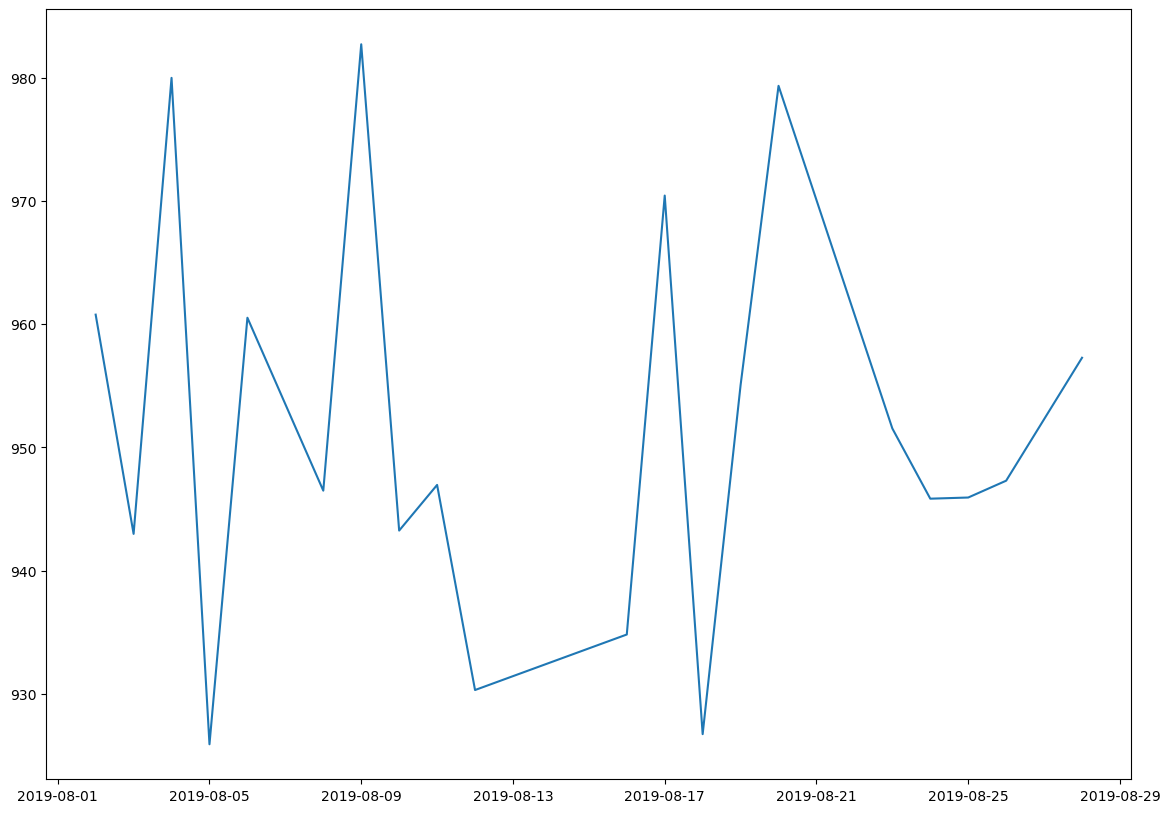

In [16]:
# Plot the data from df
plt.rcParams['figure.figsize'] = (14, 10)
plt.plot(df)
plt.show()

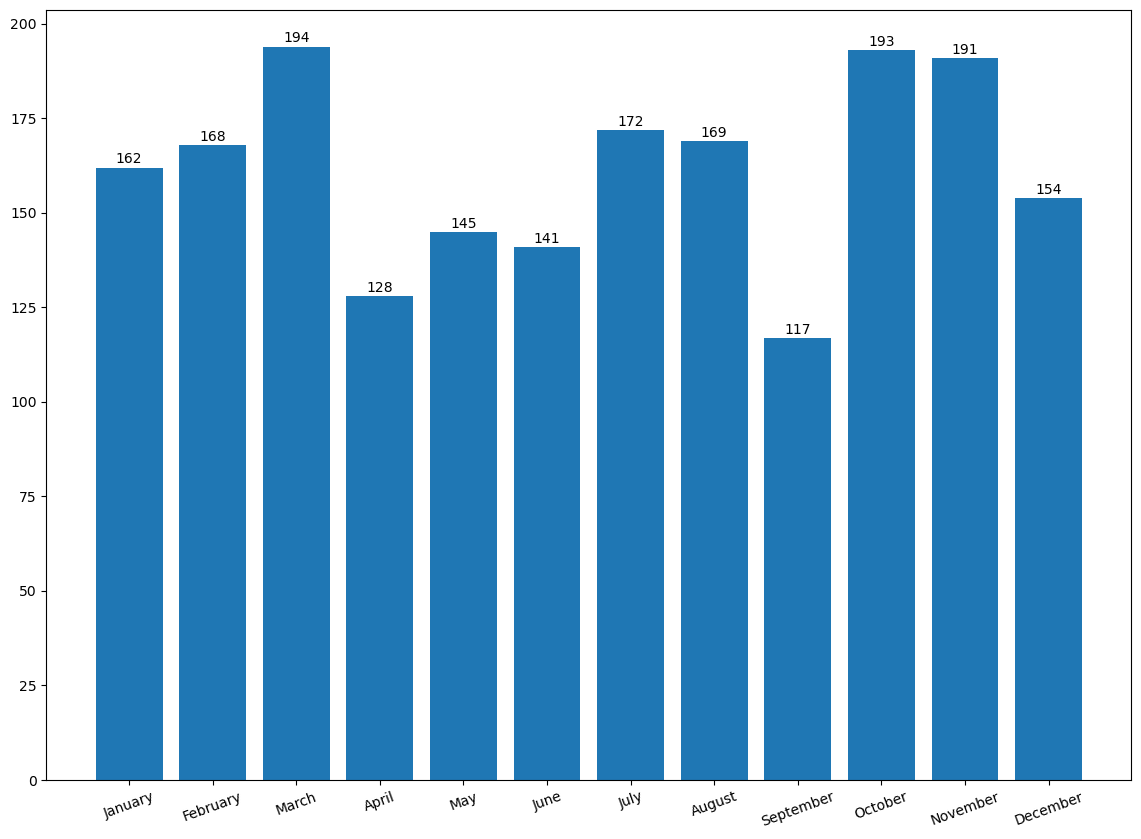

In [17]:
# bar chart for Zoloft
months = list(range(1, 13))
sold_quantity = [round(random.uniform(100, 200)) for x in range(1, 13)]
figure, axis = plt.subplots() #specify the layout of the figure and allocate space
plt.xticks(months, calendar.month_name[1:13], rotation=20) #display month names on x axis
plot = axis.bar(months, sold_quantity) #plot the graph
for rectangle in plot:
    height = rectangle.get_height()
    axis.text(rectangle.get_x() + rectangle.get_width() /2., 1.002 * height, '%d' % int(height), ha='center',
             va = 'bottom')
plt.show()

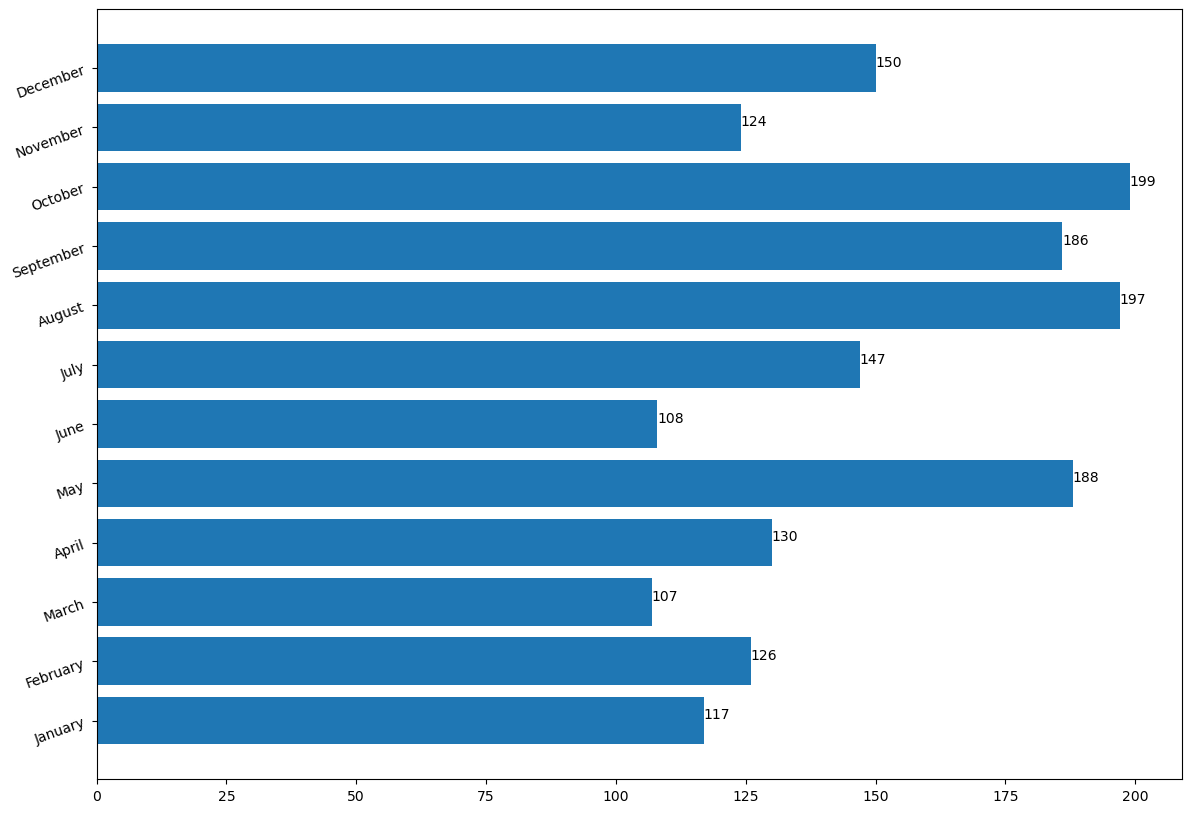

In [18]:
# Create a horizontal bar chart
months = list(range(1, 13))
sold_quantity = [round(random.uniform(100, 200)) for x in range(1, 13)]
figure, axis = plt.subplots()
plt.yticks(months, calendar.month_name[1:13], rotation=20)
plot = axis.barh(months, sold_quantity)
for rectangle in plot:
    width = rectangle.get_width()
    axis.text(width + 2.5, rectangle.get_y() + 0.38, '%d' % int(width),
    ha = 'center', va = 'bottom')
plt.show()

# Scatterplot

When should a scatterplot be used:
- When one continuous variable is dependent on another variable, which is under the control of the observer
- When both continuous variables are independent

**Dependent Variable** is the outcome variable being studied, and rely on the values of the independent variable.
**Independent Variable** is also referred to as the regressor.

In [19]:
# Scatterplot on required hours of sleep and age
headers_cols = ['age', 'min_recommended', 'max_recommended',
               'may_be_appropriate_min', 'may_be_appropriate_max', 'min_not_recommended',
               'max_not_recommended']

sleepDf = pd.read_csv(
    'https://raw.githubusercontent.com/PacktPublishing/hands-on-exploratory-data-analysis-with-python/master/Chapter%202/sleep_vs_age.csv',
    usecols=headers_cols)

sleepDf.head(10)

,age,min_recommended,max_recommended,may_be_appropriate_min,may_be_appropriate_max,min_not_recommended,max_not_recommended
0,0,14,17,11,13,11,19
1,1,14,17,11,13,11,19
2,2,14,17,11,13,11,19
3,3,14,17,11,13,11,19
4,4,12,15,10,11,10,18
5,5,12,15,10,11,10,18
6,6,12,15,10,11,10,18
7,7,12,15,10,11,10,18
8,8,12,15,10,11,10,18
9,9,12,15,10,11,10,18


sns.set()

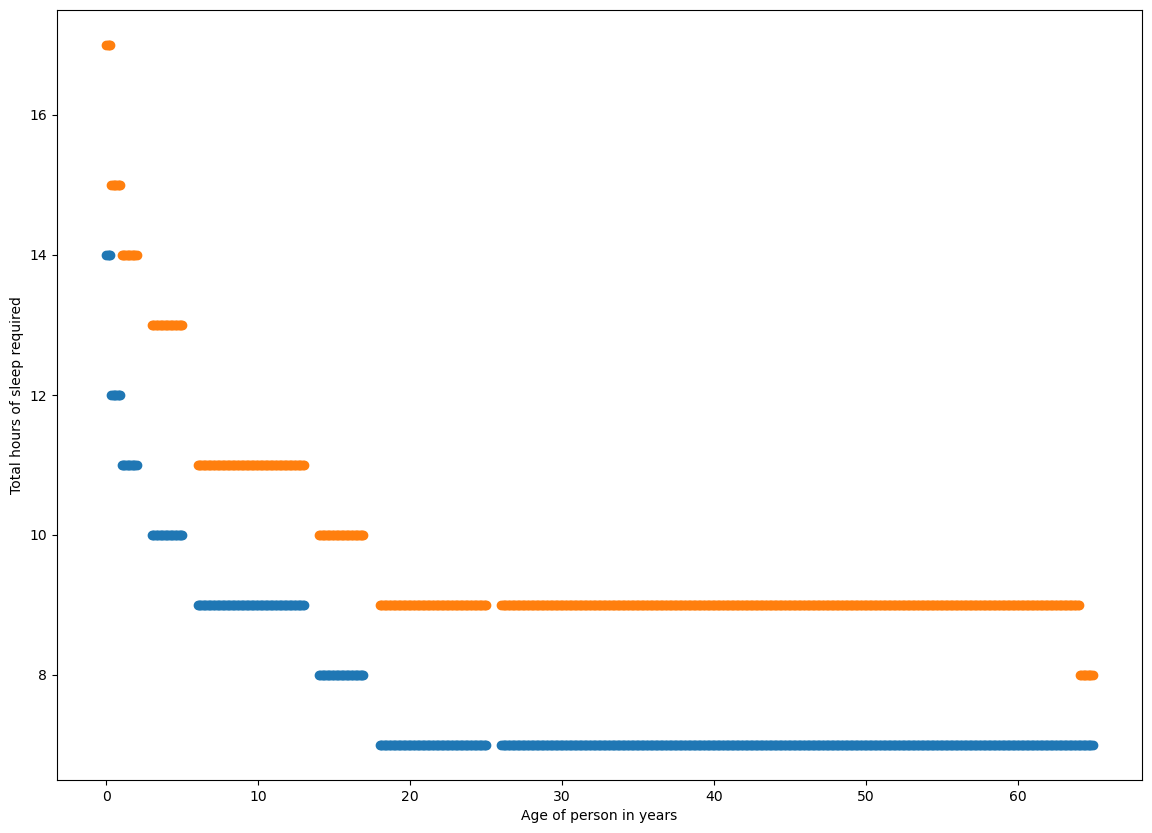

In [20]:
# A regular scatterplot
plt.scatter(x=sleepDf["age"]/12., y=sleepDf["min_recommended"])
plt.scatter(x=sleepDf["age"]/12., y=sleepDf["max_recommended"])
plt.xlabel('Age of person in years')
plt.ylabel('Total hours of sleep required')
plt.show()

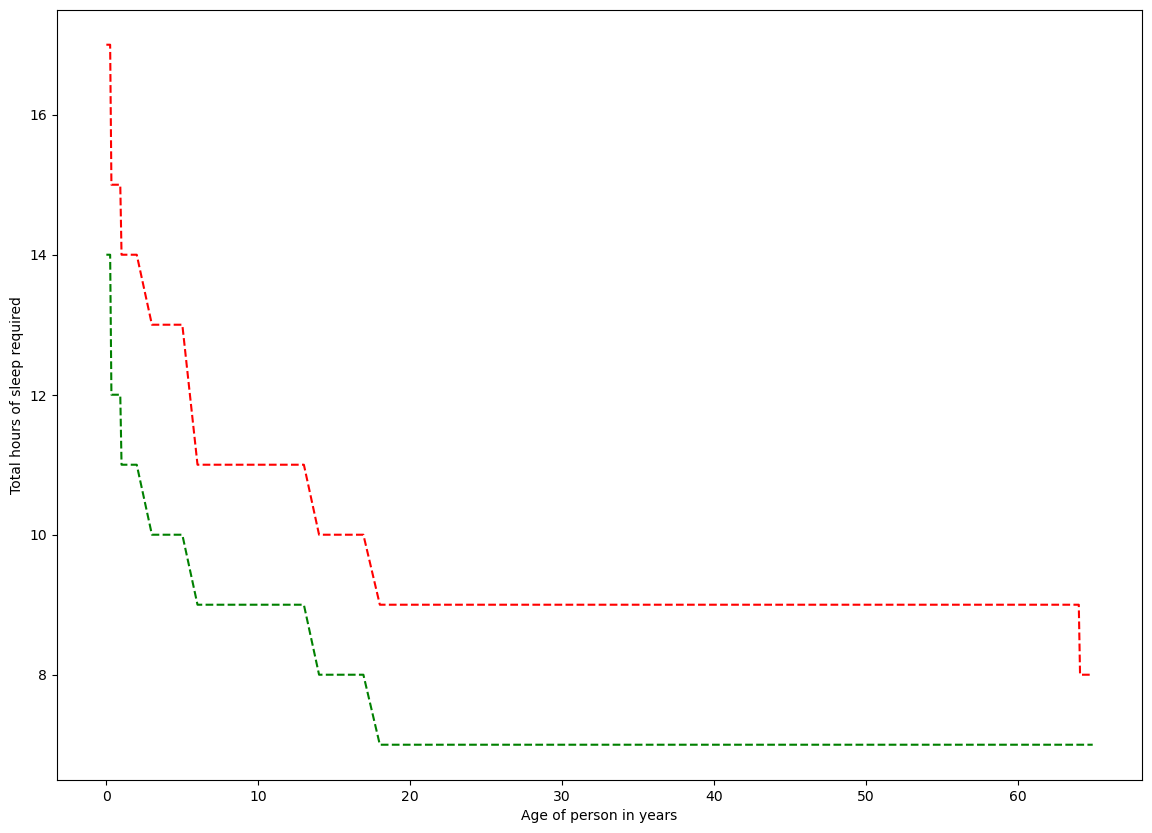

In [21]:
# Line plot of sleep data
plt.plot(sleepDf['age']/12., sleepDf['min_recommended'], 'g--')
plt.plot(sleepDf['age']/12., sleepDf['max_recommended'], 'r--')
plt.xlabel('Age of person in years')
plt.ylabel('Total hours of sleep required')
plt.show()

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['figure.dpi'] = 150

sns.set()

In [23]:
df = sns.load_dataset('iris')
df['species'] = df['species'].map({'setosa': 0, 'versicolor': 1,
                                  'virginica': 2})

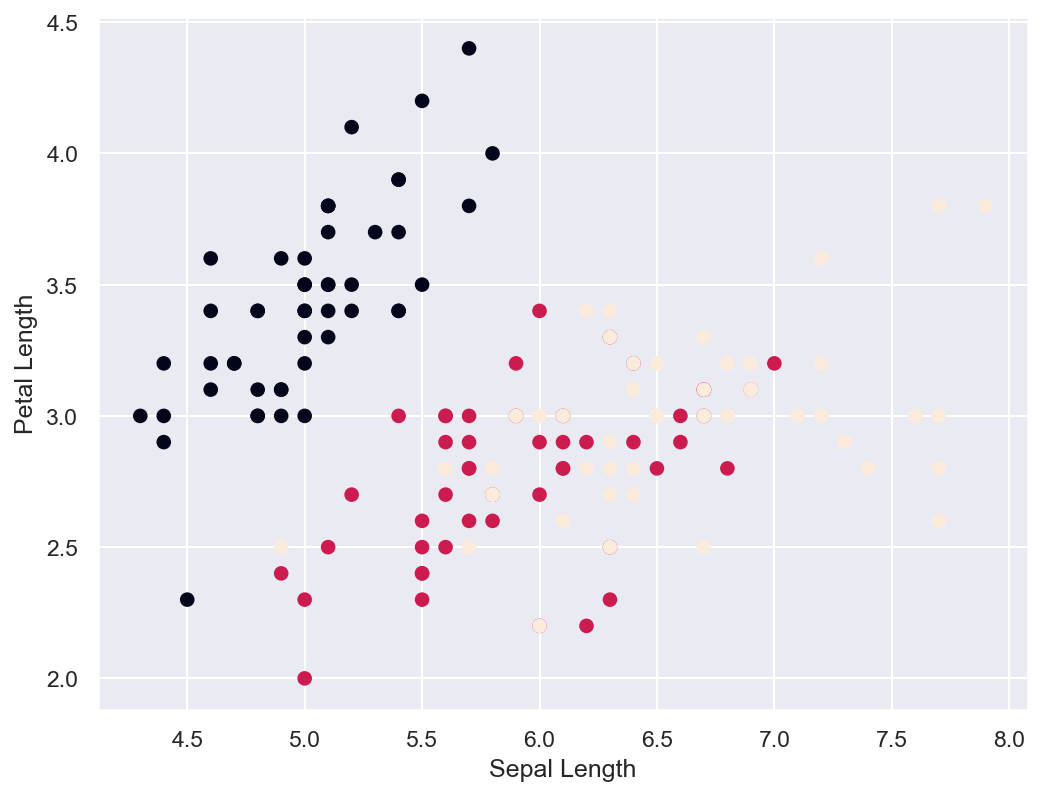

In [24]:
plt.scatter(x=df['sepal_length'], y=df['sepal_width'],
           c = df.species)
plt.xlabel('Sepal Length')
plt.ylabel('Petal Length')
plt.show()

# Bubble Chart

A bubble chart is a manifestation of the scatterplot where each data point on the graph is shown as a bubble.  Each bubble can be illustrated with a different color, size, and appearance.

In [25]:
# Load the Iris dataset
df = sns.load_dataset('iris')
df['species'] = df['species'].map({'setosa': 0, 'versicolor': 1, 
                                  'virginica': 2})

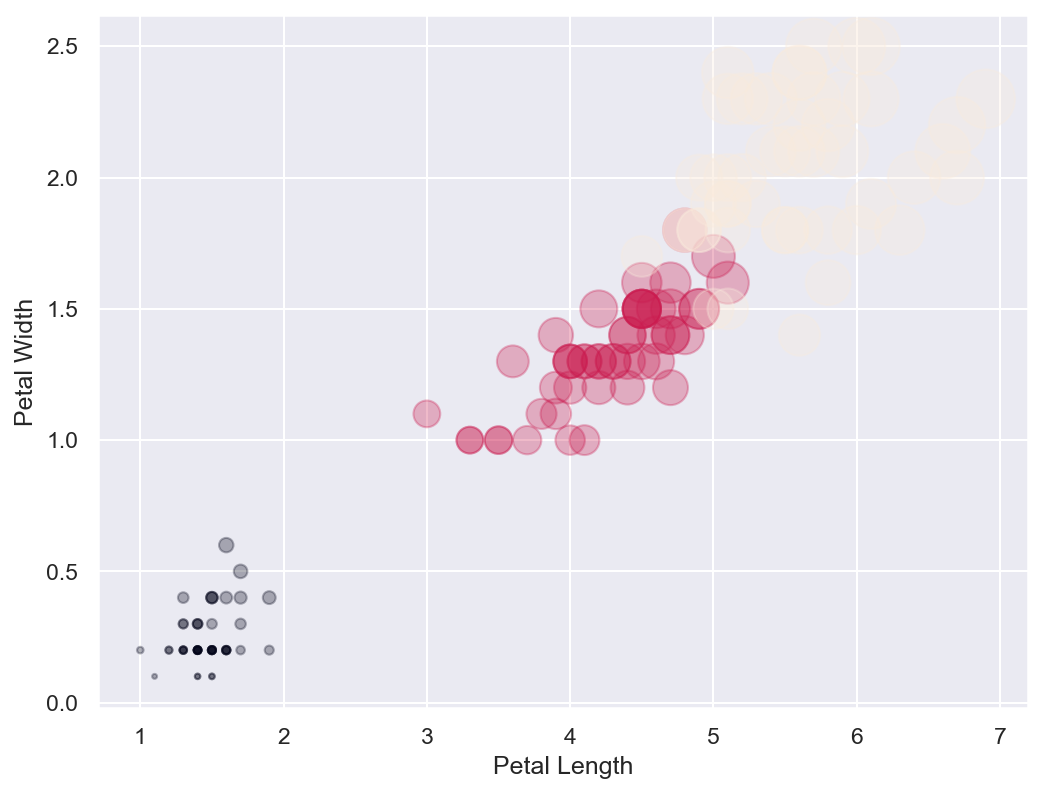

In [29]:
# Create a bubble chart
plt.scatter(df.petal_length, df.petal_width,
               s=50*df.petal_length*df.petal_width,
               c=df.species,
               alpha=0.3
               )

# Create labels for axes
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.show()

<Axes: xlabel='sepal_length', ylabel='sepal_width'>

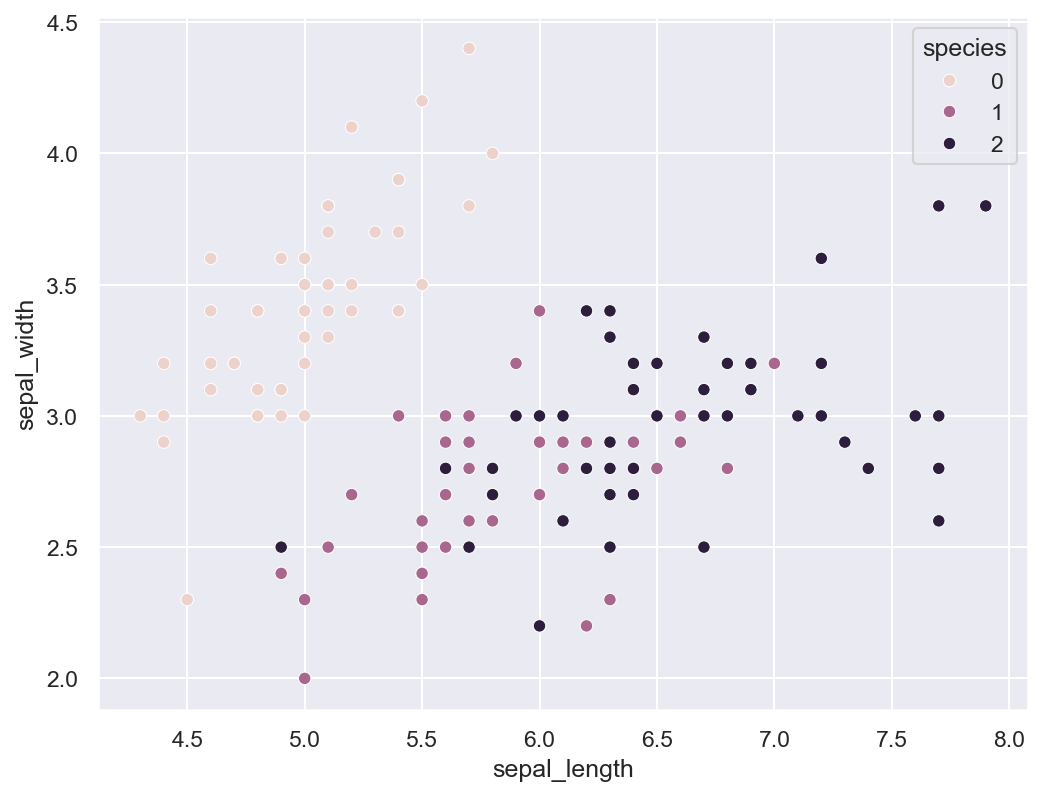

In [30]:
sns.scatterplot(x=df['sepal_length'], y=df['sepal_width'],
               hue=df.species, data=df)

# Area Plot and Stacked Plot

The stacked plot owes its name to the fact that it represents the area under a line plot and that several such plots can be stacked on top of one another, giving the feeling of a stack.  The stacked plot can be useful when we want to visualize the cumulative effect of multiple variables being plotted on the y axis.

In [35]:
# House loan mortgage cost per month for a year
houseLoanMortgage = [9000, 9000, 8000, 9000, 
                    8000, 9000, 9000, 9000,
                    9000, 8000, 9000, 9000]

# Utilities bills for a year
utilitiesBills = [4218, 4218, 4218, 4218,
                 4218, 4218, 4219, 2218,
                 3218, 4233, 3000, 3000]

# Transportation bills for a year
transportation = [782, 900, 732, 892,
                 334, 222, 300, 800,
                 900, 582, 596, 222]

# Car payment cost for one year
carPayment = [700, 701, 702, 703,
             704, 705, 706, 707,
             708, 709, 710, 711]

In [32]:
months = [x for x in range(1, 13)]

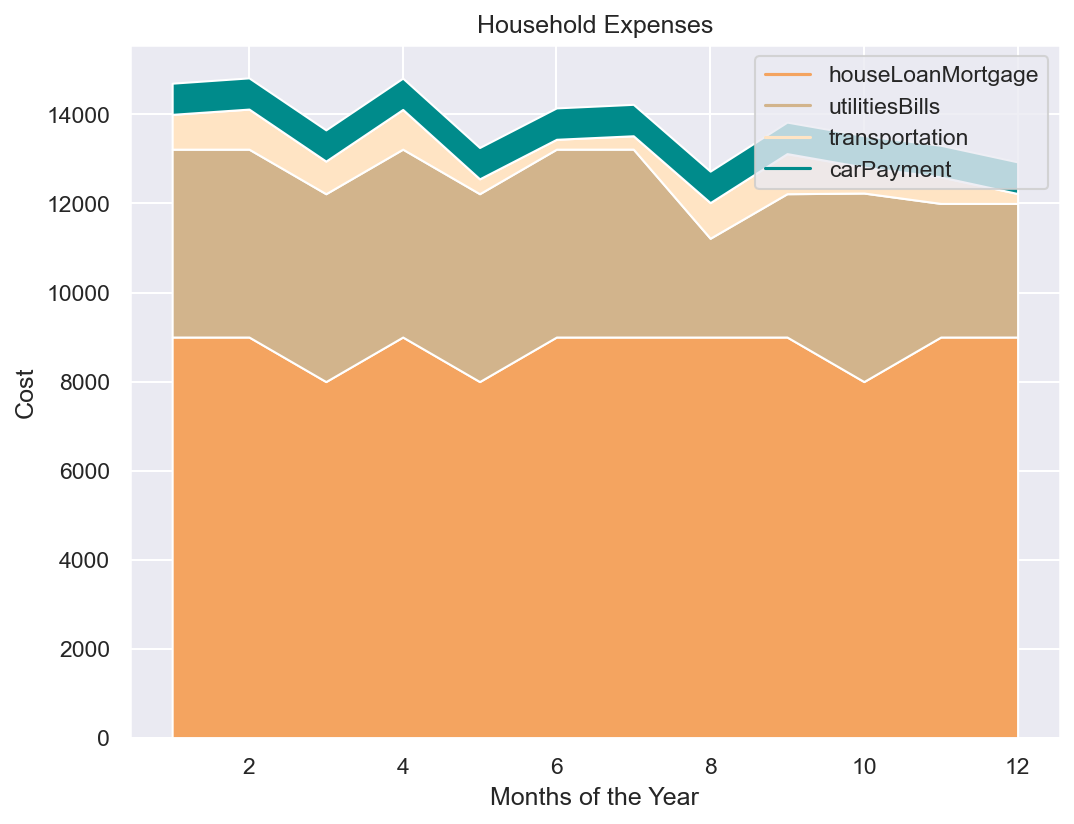

In [36]:
# Create placeholders for plot and add required color
plt.plot([], [], color='sandybrown', label='houseLoanMortgage')
plt.plot([], [], color='tan', label='utilitiesBills')
plt.plot([], [], color='bisque', label='transportation')
plt.plot([], [], color='darkcyan', label='carPayment')

# Add stacks to the plot
plt.stackplot(months, houseLoanMortgage, utilitiesBills, transportation,
             carPayment, colors=['sandybrown', 'tan', 'bisque', 'darkcyan'])
plt.legend()

# Add labels
plt.title('Household Expenses')
plt.xlabel('Months of the Year')
plt.ylabel('Cost')
plt.show()

# Pie Chart

In [37]:
# Create URL to JSON file
url = 'https://raw.githubusercontent.com/hmcuesta/PDA_Book/master/Chapter3/pokemonByType.csv'

In [38]:
# Load the first sheet of the JSON file into a dataframe
pokemon = pd.read_csv(url, index_col='type')
pokemon

,amount
type,
Bug,45
Dark,16
Dragon,12
Electric,7
Fighting,3
Fire,14
Ghost,10
Grass,31
Ground,17


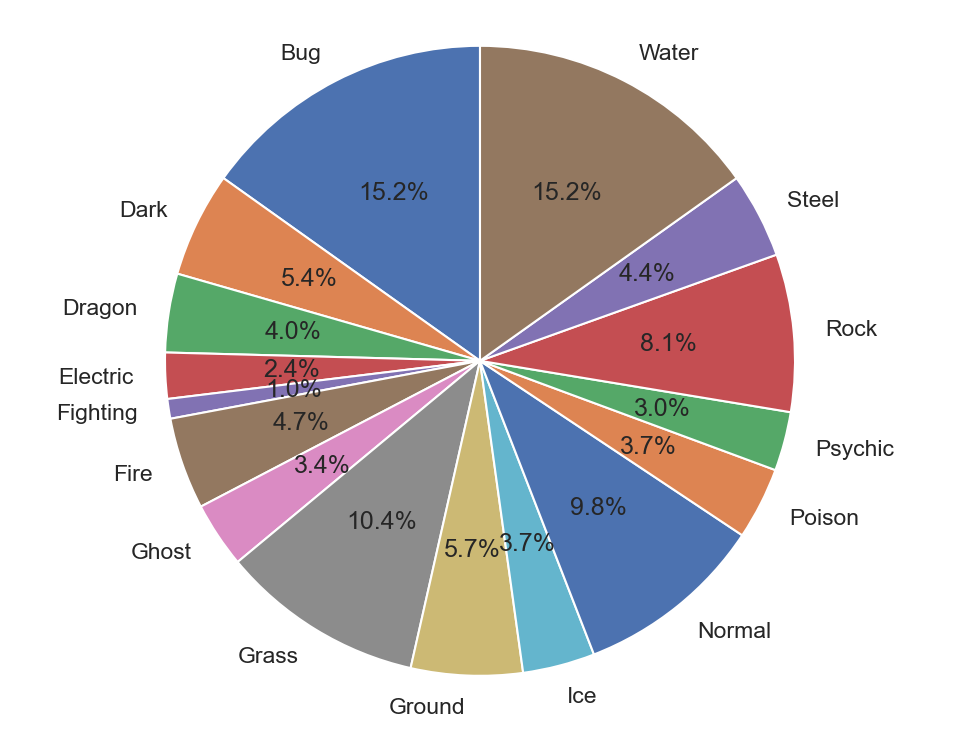

In [40]:
# Create a pie chart with the preceding data
plt.pie(pokemon['amount'], labels=pokemon.index, shadow=False, startangle=90, autopct='%1.1f%%',)
plt.axis('equal') 
plt.show()

<Axes: ylabel='amount'>

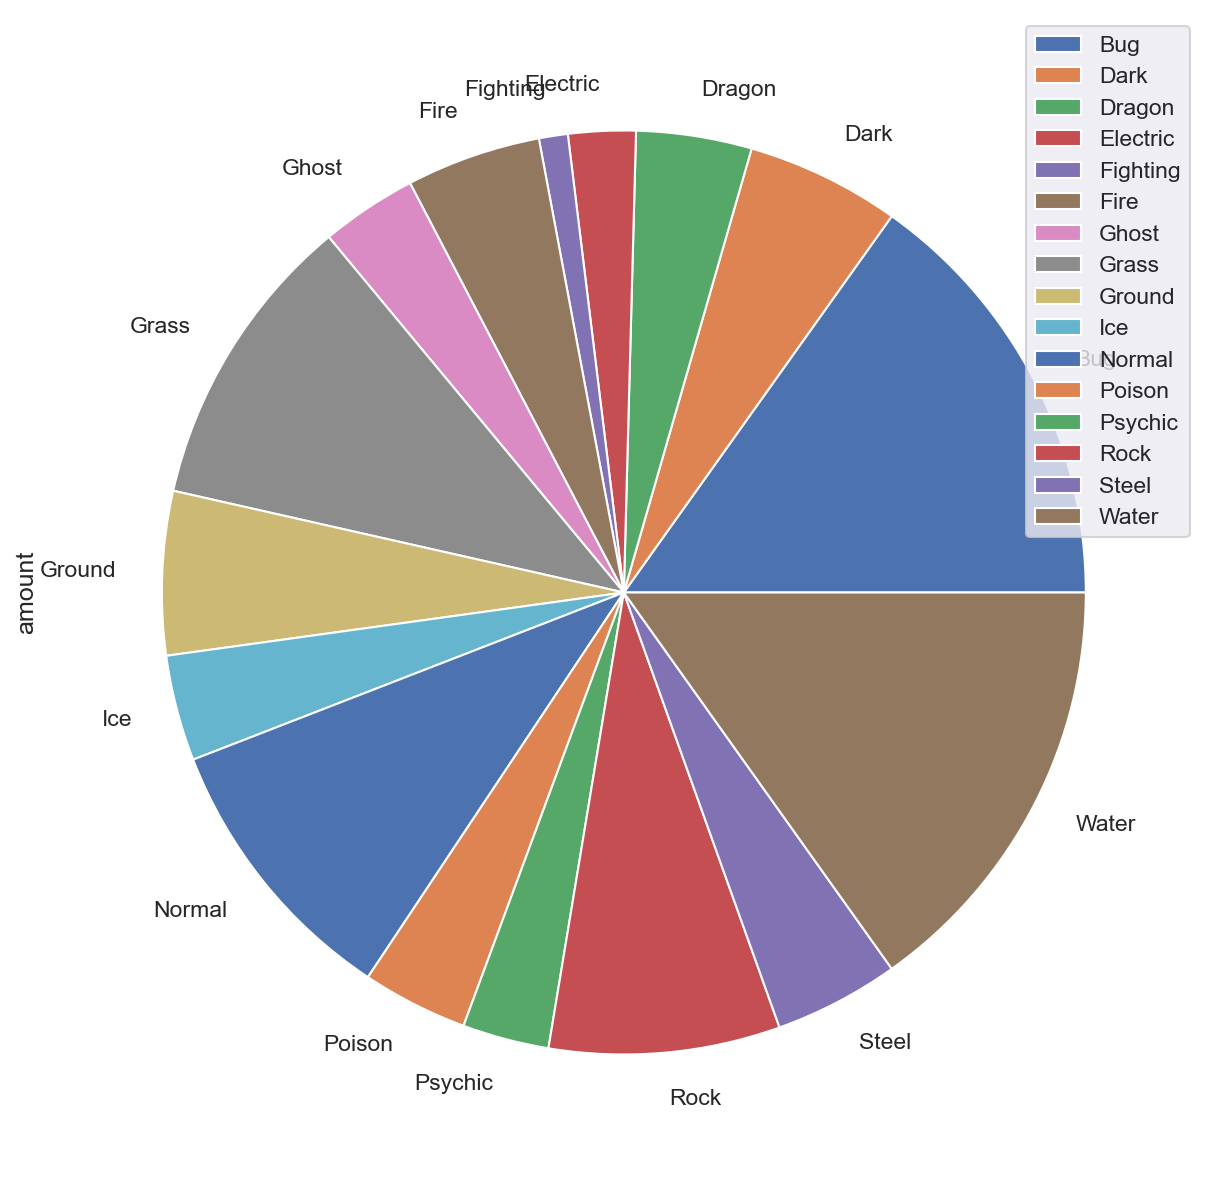

In [41]:
# Using pandas directly for the pie chart
pokemon.plot.pie(y='amount', figsize=(20, 10))

# Table Chart

A table chart combines a bar chart and a table.  In order to understand the table chart, let's consider the following dataset.  Consider standard LED bulbs that come in different wattages.  The standard Philips LED bulb can be 4.5 Watts, 6 Watts, 7 Watts, 8.5 Watts, 9.5 Watts, 13.5 Watts, and 15 Watts.  Let's assume there are two categorical variables, the year and the wattage, and a numeric variable, which is the number of units sold in a particular year.

In [42]:
# Years under consideration
years = ['2010', '2011', '2012', '2013', '2014']

In [43]:
# Available wattages
columns = ['4.5W', '6.0W', '7.0W', '8.5W', '9.5W', '13.5W', '15.0W']
unitsSold = [
            [65, 141, 88, 111, 104, 71, 99],
            [85, 142, 89, 112, 103, 73, 98],
            [75, 143, 90, 113, 89, 75, 93],
            [65, 144, 91, 114, 90, 77, 92],
            [55, 145, 92, 115, 88, 79, 93],
]

In [44]:
# Define the range and scale for the y axis
values = np.arange(0, 600, 100)

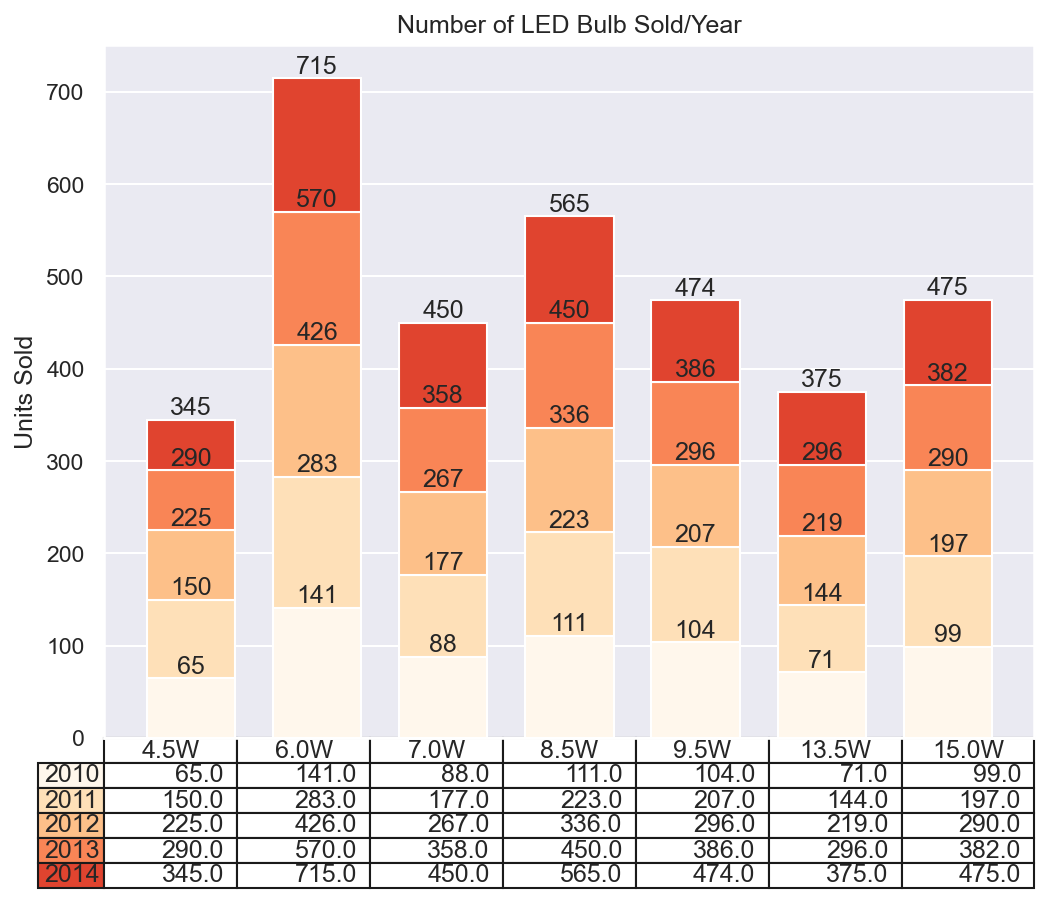

In [47]:
# Draw table
colors = plt.cm.OrRd(np.linspace(0, 0.7, len(years)))
index = np.arange(len(columns)) + 0.3
bar_width = 0.7

y_offset = np.zeros(len(columns))
fig, ax = plt.subplots()

cell_text = []

n_rows = len(unitsSold)
for row in range(n_rows):
    plot = plt.bar(index, unitsSold[row], bar_width, bottom=y_offset,
                  color=colors[row])
    y_offset = y_offset + unitsSold[row]
    cell_text.append(['%1.1f' %(x) for x in y_offset])
    i = 0
    for rect in plot:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2, y_offset[i], '%d' % int(y_offset[i]),
               ha='center', va='bottom')
        i = i+1
        
# Above each iteration of this loop labels each bar with corresponding value for the given year

# Add a table to the bottom of the axes
the_table = plt.table(cellText=cell_text, rowLabels=years,
                     rowColours=colors, colLabels=columns, loc='bottom')
plt.ylabel("Units Sold")
plt.xticks([])
plt.title('Number of LED Bulb Sold/Year')
plt.show()

# Polar Chart